# You are a data scientist working for a healthcare company, and you have been tasked with creating a decision tree to help identify patients with diabetes based on a set of clinical variables. 

You have been given a dataset (diabetes.csv) with the following variables: 

1. Pregnancies: Number of times pregnant (integer) 

2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer) 

3. BloodPressure: Diastolic blood pressure (mm Hg) (integer) 

4. SkinThickness: Triceps skin fold thickness (mm) (integer) 

5. Insulin: 2-Hour serum insulin (mu U/ml) (integer) 

6. BMI: Body mass index (weight in kg/(height in m)^2) (float) 

7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes  based on family history) (float) 

8. Age: Age in years (integer) 

9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer). 

# Here’s the dataset link: 
https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?usp=sharing



# Your goal is to create a decision tree to predict whether a patient has diabetes based on the other variables. Here are the steps you can follow:


Q1. Import the dataset and examine the variables. 
Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.


Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.


Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.


Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. 
Use cross-validation to optimize the hyperparameters and avoid overfitting.



Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. 
Use confusion matrices and ROC curves to visualize the results.


Q6. Interpret the decision tree by examining the splits, branches, and leaves. 
Identify the most important variables and their thresholds. 
Use domain knowledge and common sense to explain the patterns and trends.


Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. 
Use sensitivity analysis and scenario testing to explore the uncertainty and risks.



By following these steps, you can develop a comprehensive understanding of decision tree modeling and its applications to real-world healthcare problems. Good luck.



In [1]:
# Import The Dataset And Examine The Variables:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load The Dataset
data = pd.read_csv('diabetes.csv')

# Examine The First Few Rows of The Dataset
print(data.head()) 

# Check The Data Types And Missing Values
print(data.info())

# Get Summary Statistics 
print(data.describe())



   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [ ]:
# Visualize The Distribution Of Variables 
sns.pairplot(data, hue='Outcome')
plt.show()

In [3]:
#  Preprocess The Data  

# Check For Missing Values 
print(data.isnull().sum())

# Handle Missing Values (E.g., Impute With Mean Or Median) 
# data.fillna(data.mean(), inplace=True)

# Handle Outliers (E.g., Using Z-scores Or IQR)
# Encode Categorical Variables If Needed (There Are None In This Dataset)




Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


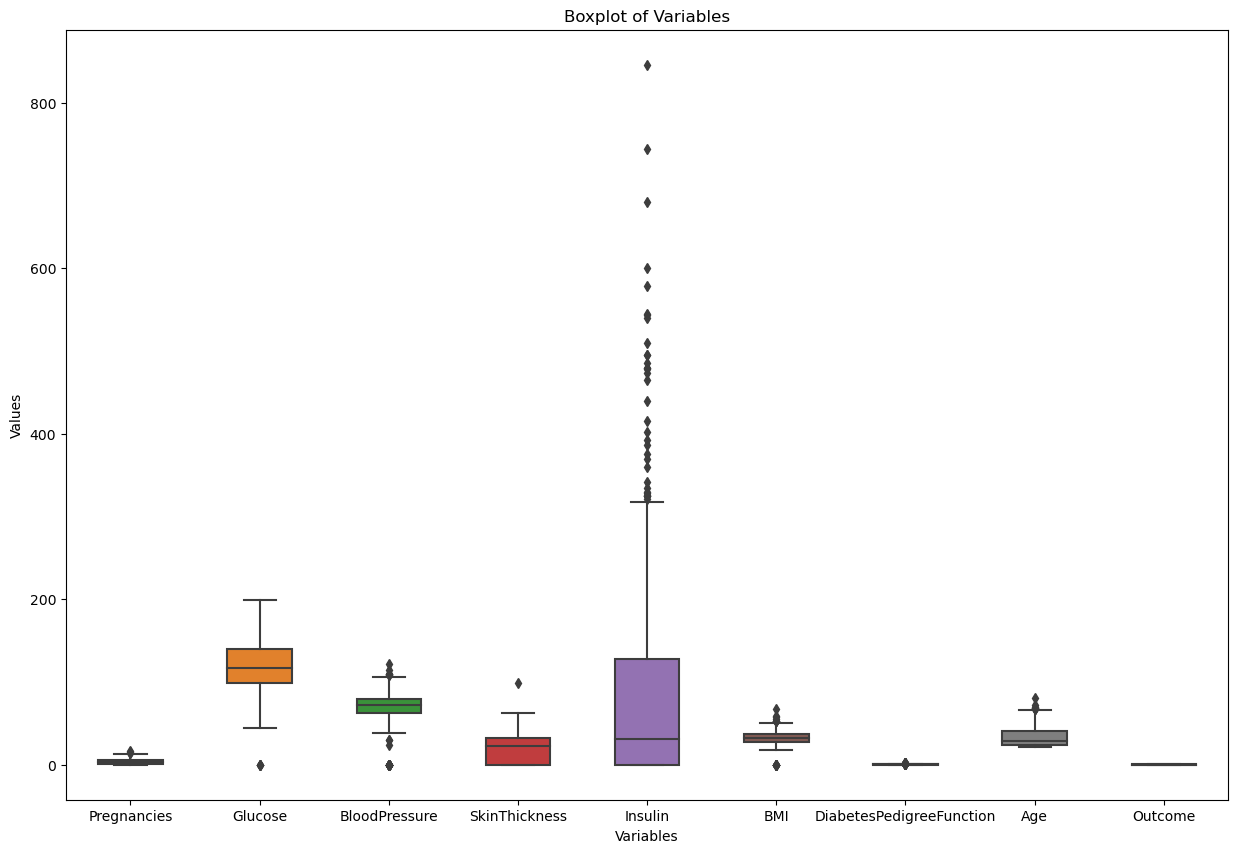

In [9]:
# Create A  Figure 
fig, ax = plt.subplots(figsize=(15, 10))

# Create A Boxplot For All Variables In The Dataset
sns.boxplot(data=data, width=0.5, ax=ax, fliersize=5)


# Set Labels And Title 

ax.set_xlabel('Variables')
ax.set_ylabel('Values')
ax.set_title('Boxplot of Variables')

# Show the plot
plt.show() 

In [4]:
# Split The Dataset Into Training And Test Sets:

from sklearn.model_selection import train_test_split 

X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split The Data With A 70-30 Or 80-20 Ratio, Using A Random Seed For Reproducibility 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)


In [11]:
from sklearn.preprocessing import StandardScaler

# Initialize The StandardScaler
scaler = StandardScaler()

# Fit And Transform The Scaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')


# Define The Parameter Grid 
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}



# Create A Decision Tree Classifier 
tree_classifier = DecisionTreeClassifier(random_state=40) 

# Create A GridSearchCV Object With Cross-Validation
grid_search = GridSearchCV(estimator=tree_classifier, param_grid=param_grid, cv=5, scoring='accuracy')


# Fit The Grid Search To Your Training Data 
grid_search.fit(X_train_scaled, y_train) 

# Get The Best Hyper Parameters 
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'splitter': 'best'}


In [14]:
from sklearn.tree import DecisionTreeClassifier

# Create A Decision Tree Classifier With The Best Hyperparameters 
best_tree_classifier = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    max_features='log2',
    splitter='best',
    random_state=40
) 

# Train The Model With The Best Hyperparameters On The Scaled Training Data 
best_tree_classifier.fit(X_train_scaled, y_train)

# Evaluate The Model's Performance On The Test Data 
best_model_score = best_tree_classifier.score(X_test_scaled, y_test)
print("Model Accuracy with Best Hyperparameters:", best_model_score)


Model Accuracy with Best Hyperparameters: 0.7467532467532467


In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Make Predictions On The Test Set
y_pred = best_tree_classifier.predict(X_test_scaled) 

# Calculate Precision, Recall, And F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)





Precision: 0.717391304347826
Recall: 0.559322033898305
F1 Score: 0.6285714285714286


Confusion Matrix:
 [[82 13]
 [26 33]]


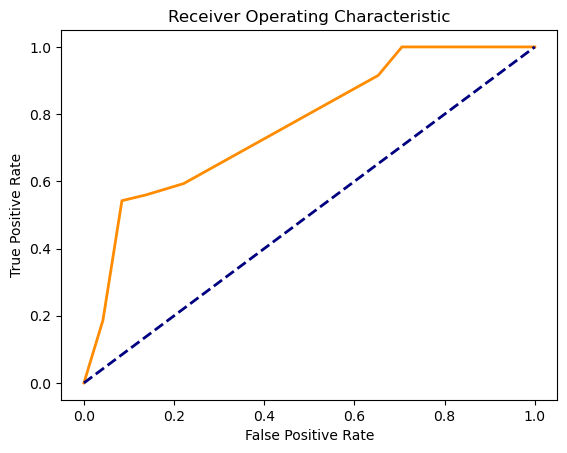

In [24]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Calculate The Confusion Matrix 
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot The ROC Curve and Calculate AUC  
y_prob = best_tree_classifier.predict_proba(X_test_scaled)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob) 

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')




plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()


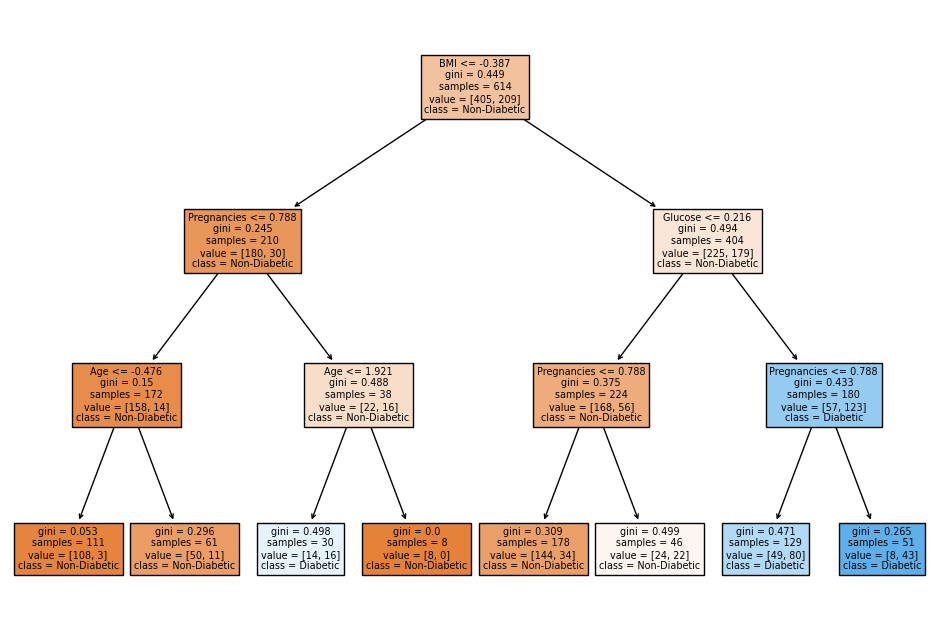

In [25]:
#  Interpret The Decision Tree:


from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(best_tree_classifier, filled=True, feature_names=X.columns, class_names=['Non-Diabetic', 'Diabetic'])
plt.show()

